Metode Regresi Linear

R-squared :  0.3594095049945736


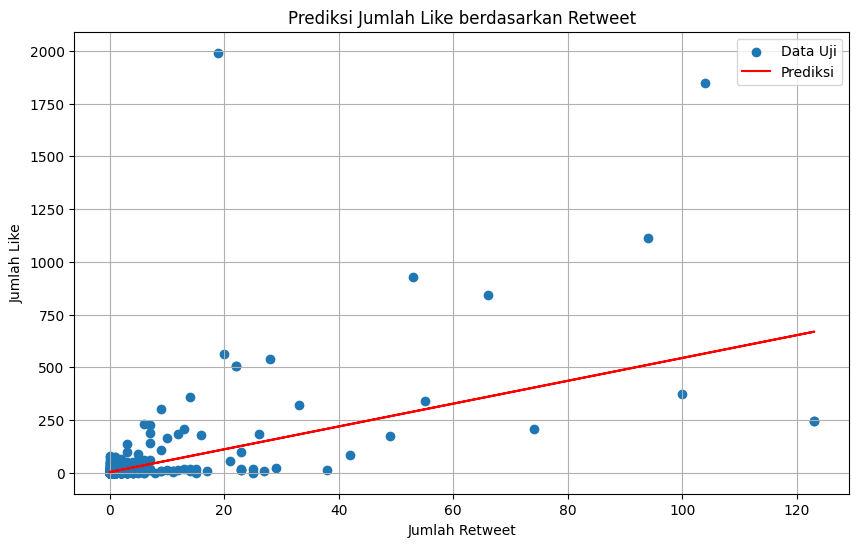

Prediksi 'Jumlah Like' untuk tweet dengan 50 Retweet :  273.447


In [6]:
import pandas as pede
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pede.read_csv("combined_data.csv", header=None, on_bad_lines='skip')

df.rename(columns={4: 'metric_retweet', 6: 'like_count'}, inplace=True)
df['metric_retweet'] = pede.to_numeric(df['metric_retweet'], errors='coerce').fillna(0)
df['like_count'] = pede.to_numeric(df['like_count'], errors='coerce').fillna(0)

x = df[['metric_retweet']]
y = df['like_count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r_squared = model.score(x_test, y_test)
print('Metode Regresi Linear\n')
print("R-squared : ", r_squared)

plt.figure(figsize = (10,6))
plt.scatter(x_test, y_test, label = 'Data Uji')
plt.plot(x_test, y_pred, color = 'red', label = 'Prediksi')
plt.xlabel('Jumlah Retweet')
plt.ylabel('Jumlah Like')
plt.title('Prediksi Jumlah Like berdasarkan Retweet')
plt.legend()
plt.grid(True)
plt.show()

retweet_baru = pede.DataFrame([[50]], columns=['metric_retweet']) 
prediksi_like = model.predict(retweet_baru)

print("Prediksi 'Jumlah Like' untuk tweet dengan 50 Retweet : ", prediksi_like[0].round(3))